In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

ROOT_DIR = '/content/drive/MyDrive/Fire-Detection'
TRAIN_IMAGES = f'{ROOT_DIR}/train/images'
TRAIN_LABELS = f'{ROOT_DIR}/train/labels'
VALID_IMAGES = f'{ROOT_DIR}/valid/images'
YAML_PATH = f'{ROOT_DIR}/data.yaml'
CROP_DIR = f'{ROOT_DIR}/train/crops'
META_CSV = f'{ROOT_DIR}/train/metadata.csv'

Mounted at /content/drive


In [2]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17511, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 17511 (delta 5), reused 0 (delta 0), pack-reused 17491 (from 3)
Receiving objects: 100% (17511/17511), 16.62 MiB | 22.54 MiB/s, done.
Resolving deltas: 100% (12000/12000), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 

In [3]:
!python train.py \
  --img 416 \
  --batch 8 \
  --epochs 1 \
  --data {YAML_PATH} \
  --weights yolov5s.pt \
  --name Fire_Detector

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-07-06 22:43:01.172174: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751841781.213570    1073 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751841781.225871    1073 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

In [4]:
import glob, os
weights = sorted(glob.glob('runs/train/*/weights/best.pt'), key=os.path.getmtime)[-1]
print("Found weights:", weights)

Found weights: runs/train/Fire_Detector/weights/best.pt


detect: weights=['runs/train/Fire_Detector/weights/best.pt'], source=/content/drive/MyDrive/Fire-Detection/F_1954.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/inference, name=test_results, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/Fire-Detection/F_1954.jpg: 288x416 (no detections), 395.0ms
Speed: 9.0ms pre-process, 395.0ms inference, 0.4ms NMS per image at shape (1, 3, 416, 416)
Results saved to yolov5/inference/test_results
0 labels saved to yolov5/inference/test_results/labels


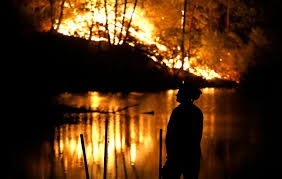

In [5]:
# Perform inference with trained weights
TEST_IMAGE = f'{ROOT_DIR}/F_1954.jpg'  # change to a real test image path

!python detect.py \
  --weights {weights} \
  --img 416 \
  --conf 0.25 \
  --source {TEST_IMAGE} \
  --save-txt \
  --save-conf \
  --project yolov5/inference \
  --name test_results \
  --exist-ok

# Display the result image
from IPython.display import Image as IPyImage, display
display(IPyImage(filename='yolov5/inference/test_results/F_1954.jpg'))

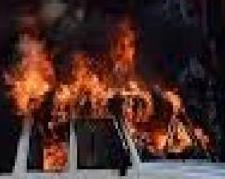

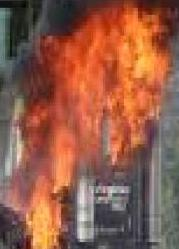

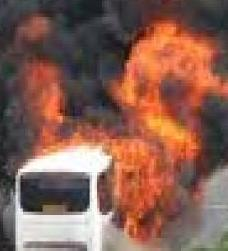

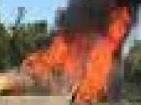

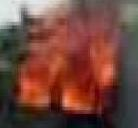

✅ Crops saved to /content/drive/MyDrive/Fire-Detection/train/crops


In [6]:
import cv2
from glob import glob
from PIL import Image as PILImage
import io
from IPython.display import display, Image as IPyImage
import numpy as np

os.makedirs(CROP_DIR, exist_ok=True)
crop_counter = {}
preview_limit = 5
preview_count = 0

for label_path in glob(f'{TRAIN_LABELS}/*.txt'):
    filename = os.path.basename(label_path).replace('.txt', '.jpg')
    image_path = os.path.join(TRAIN_IMAGES, filename)
    image = cv2.imread(image_path)
    if image is None:
        continue
    h, w = image.shape[:2]

    with open(label_path) as f:
        for i, line in enumerate(f):
            parts = list(map(float, line.strip().split()))
            _, x, y, bw, bh = parts
            x1, y1 = int((x - bw/2) * w), int((y - bh/2) * h)
            x2, y2 = int((x + bw/2) * w), int((y + bh/2) * h)
            crop = image[max(0,y1):y2, max(0,x1):x2]
            if crop.size == 0: continue

            name = f"{os.path.splitext(filename)[0]}_{i}.jpg"
            cv2.imwrite(f"{CROP_DIR}/{name}", crop)
            crop_counter[filename] = crop_counter.get(filename, 0) + 1

            if preview_count < preview_limit:
                img_rgb = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
                buf = io.BytesIO()
                PILImage.fromarray(img_rgb).save(buf, format='JPEG')
                display(IPyImage(data=buf.getvalue()))
                preview_count += 1

print(f"✅ Crops saved to {CROP_DIR}")

In [7]:
import pandas as pd

META_CSV = '/content/drive/MyDrive/Fire-Detection/train/metadata.csv'
df = pd.read_csv(META_CSV)
print(f"✅ Loaded metadata with {len(df)} rows")

from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

time_map = {'morning': 0, 'day': 1, 'evening': 2, 'night': 3}
df['time_of_day'] = df['time_of_day'].map(time_map)
meta_features = ['bbox_area', 'avg_brightness', 'image_width', 'image_height', 'time_of_day']
scaler = StandardScaler()
X_meta = scaler.fit_transform(df[meta_features].values)
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])  # minor=0, moderate=1, severe=2
y = to_categorical(df['label_encoded'])

✅ Loaded metadata with 542 rows


In [8]:
import os
import cv2
import numpy as np
from glob import glob

CROP_DIR = '/content/drive/MyDrive/Fire-Detection/train/crops'
all_crop_paths = glob(os.path.join(CROP_DIR, '*.jpg'))

crop_map = {}
for path in all_crop_paths:
    fname = os.path.basename(path)
    base = fname.rsplit('_', 1)[0] + '.jpg'
    crop_map.setdefault(base, []).append(path)

X_img = []
missing = 0

for i, fname in enumerate(df['filename']):
    crops = crop_map.get(fname, [])
    if not crops:
        X_img.append(np.zeros((128, 128, 3)))
        missing += 1
        continue
    img = cv2.imread(crops[0])
    if img is None:
        X_img.append(np.zeros((128, 128, 3)))
        missing += 1
        continue
    img = cv2.resize(img, (128, 128))
    X_img.append(img)

X_img = np.array(X_img) / 255.0
print(f"Loaded {len(X_img)} images with {missing} missing")

Loaded 542 images with 0 missing


In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from IPython.display import Image as IPyImage
import matplotlib.pyplot as plt

img_input = Input(shape=(128, 128, 3), name='img_input')
x = Conv2D(32, (3, 3), activation='relu')(img_input)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D()(x)
x = Flatten()(x)

tabular_input = Input(shape=(5,), name='tabular_input')
y_meta = Dense(32, activation='relu')(tabular_input)

merged = Concatenate()([x, y_meta])
z = Dense(128, activation='relu')(merged)
z = Dropout(0.3)(z)
z = Dense(3, activation='softmax')(z)

model = Model(inputs=[img_input, tabular_input], outputs=z) # model defining
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ img_input           │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 126, 126,  │        896 │ img_input[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 63, 63,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 61, 61,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 30, 30,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tabular_input       │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 57600)     │          0 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 32)        │        192 │ tabular_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 57632)     │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │  7,377,024 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 3)         │        387 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,396,995 (28.22 MB)

 Trainable params: 7,396,995 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.fit([X_img, X_meta], y, epochs=1, batch_size=16, validation_split=0.2)

28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 506ms/step - accuracy: 0.5265 - loss: 1.0627 - val_accuracy: 0.7064 - val_loss: 0.7769


17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 242ms/step
              precision    recall  f1-score   support

       minor       0.53      0.90      0.67       134
    moderate       1.00      0.01      0.02        95
      severe       0.81      0.81      0.81       313

    accuracy                           0.69       542
   macro avg       0.78      0.57      0.50       542
weighted avg       0.77      0.69      0.64       542



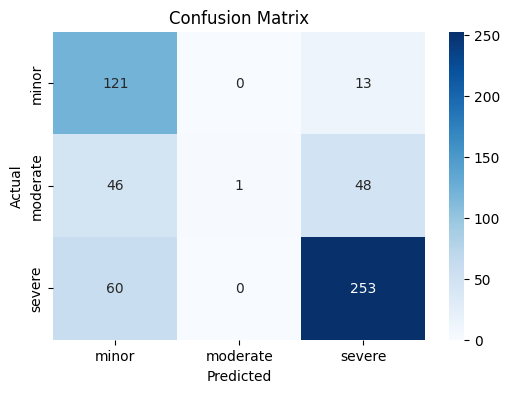

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict([X_img, X_meta])
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y, axis=1)

print(classification_report(y_true_labels, y_pred_labels, target_names=label_encoder.classes_))

cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
